In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC

In [3]:
path = "../data/Cancer_Winsconcin.csv"
cancer_df = pd.read_csv(path)
cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
# Convertimos la variable categórica 'diagnosis' a numerica
cancer_df = pd.get_dummies(cancer_df, columns=['diagnosis'], drop_first=True)

In [5]:
X = cancer_df.drop(['diagnosis_M'], axis=1)
y = cancer_df['diagnosis_M']
random_seed = 1
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, test_size=0.2)

In [25]:
model = SVC(kernel='poly', degree=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
cm = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healty'],
                         columns=['predicted_cacner', 'predicted_healty'])
confusion

predicted_cacner  predicted_healty
is_cancer                72                 0
is_healty                42                 0

Text(0.5, 1.0, 'Confusion Matrix. SVM.')

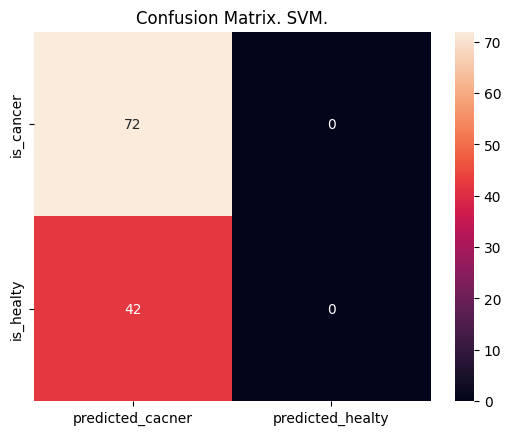

In [27]:
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix. SVM.')

In [9]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### Normalization

$$
X' = \frac{X-X_{min}}{X_{max}-X_{min}}
$$

In [10]:
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max-X_train_min)
X_train_scaled = (X_train-X_train_min)/(X_train_range)

In [11]:
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = (X_test_max-X_test_min)
X_test_scaled = (X_test-X_test_min)/(X_test_range)

In [12]:
model_nor = SVC()
model_nor.fit(X_train_scaled, y_train)
y_pred = model_nor.predict(X_test_scaled)

<AxesSubplot: >

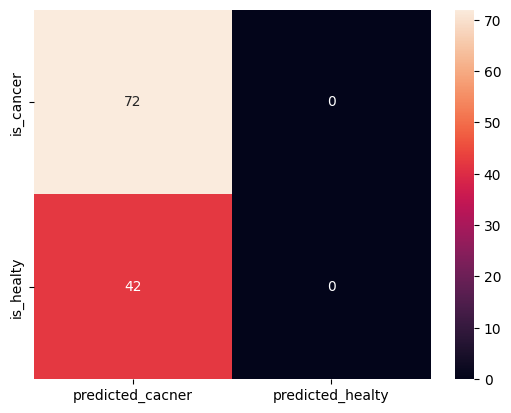

In [13]:
sns.heatmap(confusion, annot=True)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.000
Recall: 0.000
Accuracy: 0.632
F1 Score: 0.000


/home/oscarteran/Documentos/Cloud-Bridge/models/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Tutorial](https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878)

In [16]:
model_nor = SVC()
model_nor.fit(X_train_scaled, y_train)
y_pred = model_nor.predict(X_test_scaled)

In [17]:
cm = np.array(confusion_matrix(y_test, y_pred))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healty'],
                         columns=['predicted_cacner', 'predicted_healty'])
confusion

predicted_cacner  predicted_healty
is_cancer                72                 0
is_healty                42                 0